In [ ]:
#ERA5 reaanalysis data 
#https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=form
#@author: yagizcanurkmez

In [4]:
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = '/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/ecmwf_ERA5_2020_to_2025.zip'
extraction_dir = "/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/"

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Open and extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

print(f'Files extracted to {extraction_dir}')

Files extracted to /Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/


In [5]:
import xarray as xr
import netCDF4

In [95]:
ds_inst = xr.open_dataset('/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/data_stream-oper_stepType-instant.nc',engine='netcdf4')
ds_accum = xr.open_dataset('/Volumes/YagizHDD/Meteorological-Applications/DATA/ERA5/data_stream-oper_stepType-accum.nc',engine='netcdf4')

In [97]:
ds_accum_filt=ds_accum.where(ds_accum["tp"] >=0, 0) #filtering out the negative values
ds_accum_filt.min()

<xarray.Dataset> Size: 16B
Dimensions:  ()
Coordinates:
    number   int64 8B 0
Data variables:
    tp       float64 8B 0.0

In [17]:
import import_ipynb
from example_AIFS_data import wanted_lat_lon

In [ ]:
lat_num, lon_num= wanted_lat_lon(ds_accum_filt,41.07,29.01) #Gayrettepe, Istanbul

prec_2024= ds_accum_filt.sel(valid_time=slice("2024-01-01", "2024-12-31"))
prec_gayrettepe= prec_2024.tp[:,lat_num,lon_num]

Latitude number is: 4
Longitude number is: 16


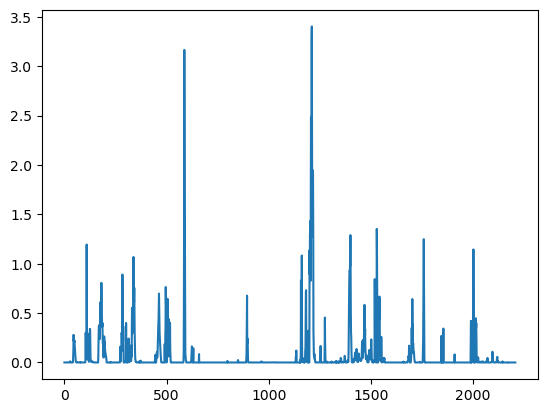

In [112]:
import matplotlib.pyplot as plt

plt.plot(prec_gayrettepe*1000)


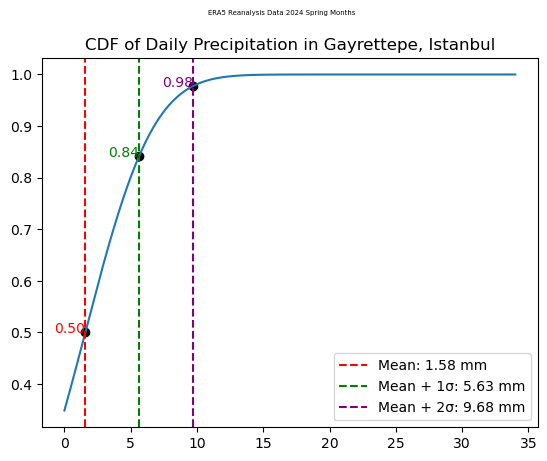

In [ ]:

from scipy.stats import norm
import numpy as np

prec_gayrettepe_daily = prec_gayrettepe.resample(valid_time='D').sum()*1000 # to daily and mm
prec_gayrettepe_val = prec_gayrettepe_daily.values
mu = np.mean(prec_gayrettepe_val)
sigma = np.std(prec_gayrettepe_val)
x= np.linspace(prec_gayrettepe_val.min(), prec_gayrettepe_val.max(), 1000)

plt.plot(x, norm.cdf(x, mu, sigma))
plt.axvline(x=mu, color='r', linestyle='--',label=f'Mean: {mu:.2f} mm')
plt.axvline(x=mu + sigma, color='g', linestyle='--', label=f'Mean + 1σ: {mu + sigma:.2f} mm')
plt.axvline(x=mu + 2*sigma, color='purple', linestyle='--', label=f'Mean + 2σ: {mu + 2*sigma:.2f} mm')
# Highlight the intersection point of the mean line on the CDF
cdf_value_at_mu = norm.cdf(mu, mu, sigma)
plt.scatter(mu, cdf_value_at_mu, color='black')
plt.text(mu,cdf_value_at_mu,f'{cdf_value_at_mu:.2f}', color='r', ha='right')
cdf_value_at_mu_plus_sigma = norm.cdf(mu + sigma, mu, sigma)
plt.scatter(mu + sigma, cdf_value_at_mu_plus_sigma, color='black')
plt.text(mu + sigma, cdf_value_at_mu_plus_sigma, f'{cdf_value_at_mu_plus_sigma:.2f}', color='g', ha='right')
cdf_value_at_mu_plus_2sigma = norm.cdf(mu + 2 * sigma, mu, sigma)
plt.scatter(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, color='black')
plt.text(mu + 2 * sigma, cdf_value_at_mu_plus_2sigma, f'{cdf_value_at_mu_plus_2sigma:.2f}', color='purple', ha='right')



plt.title('CDF of Daily Precipitation in Gayrettepe, Istanbul')
plt.suptitle('ERA5 Reanalysis Data 2024 Spring Months',fontsize=5)
plt.legend()

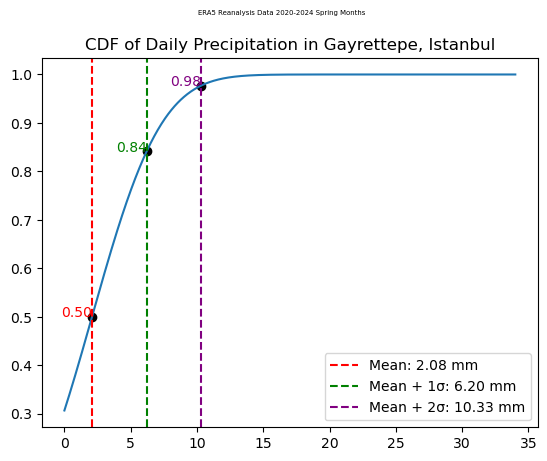

In [ ]:
#2020-2024

prec_gayrettepe_20_24=ds_accum_filt.sel(valid_time=slice("2020-01-01", "2024-12-31")).tp[:,lat_num,lon_num]
prec_gayrettepe_20_24_daily = prec_gayrettepe_20_24.resample(valid_time='D').sum()*1000

mu_20_24 = np.mean(prec_gayrettepe_20_24_daily)
sigma_20_24 = np.std(prec_gayrettepe_20_24_daily)

x2= np.linspace(float(prec_gayrettepe_20_24_daily.min()), float(prec_gayrettepe_20_24_daily.max()), 1000)

plt.plot(x2, norm.cdf(x2, mu_20_24, sigma_20_24))
plt.axvline(x=mu_20_24, color='r', linestyle='--',label=f'Mean: {mu_20_24:.2f} mm')
plt.axvline(x=mu_20_24 + sigma_20_24, color='g', linestyle='--', label=f'Mean + 1σ: {mu_20_24 + sigma_20_24:.2f} mm')
plt.axvline(x=mu_20_24 + 2*sigma_20_24, color='purple', linestyle='--', label=f'Mean + 2σ: {mu_20_24 + 2*sigma_20_24:.2f} mm')
# Highlight the intersection point of the mean line on the CDF
cdf_value_at_mu_20_24 = norm.cdf(mu_20_24, mu_20_24, sigma_20_24)
plt.scatter(mu_20_24, cdf_value_at_mu_20_24, color='black')
plt.text(mu_20_24,cdf_value_at_mu_20_24,f'{cdf_value_at_mu_20_24:.2f}', color='r', ha='right')
cdf_value_at_mu_plus_sigma_20_24 = norm.cdf(mu_20_24 + sigma_20_24, mu_20_24, sigma_20_24)
plt.scatter(mu_20_24 + sigma_20_24, cdf_value_at_mu_plus_sigma_20_24, color='black')
plt.text(mu_20_24 + sigma_20_24, cdf_value_at_mu_plus_sigma_20_24, f'{cdf_value_at_mu_plus_sigma_20_24:.2f}', color='g', ha='right')
cdf_value_at_mu_plus_2sigma_20_24 = norm.cdf(mu_20_24 + 2 * sigma_20_24, mu_20_24, sigma_20_24)
plt.scatter(mu_20_24 + 2 * sigma_20_24, cdf_value_at_mu_plus_2sigma_20_24, color='black')
plt.text(mu_20_24 + 2 * sigma_20_24, cdf_value_at_mu_plus_2sigma_20_24, f'{cdf_value_at_mu_plus_2sigma_20_24:.2f}', color='purple', ha='right')



plt.title('CDF of Daily Precipitation in Gayrettepe, Istanbul')
plt.suptitle('ERA5 Reanalysis Data 2020-2024 Spring Months',fontsize=5)
plt.legend()


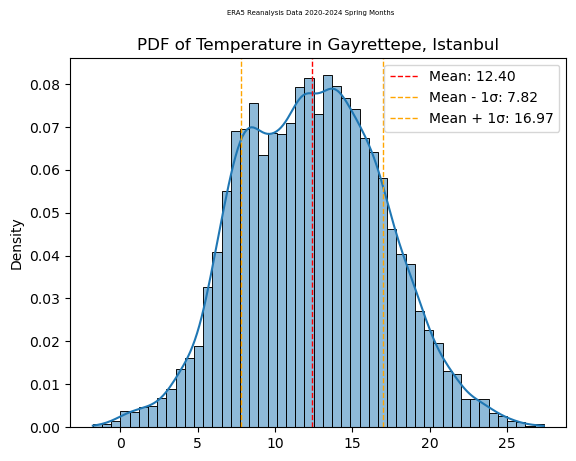

In [223]:
import seaborn as sns

temp_gayrettepe= ds_inst.sel(valid_time=slice("2020-01-01", "2025-12-31")).t2m[:,lat_num,lon_num]-273.15
mu_temp= temp_gayrettepe.mean()
sigma_temp= temp_gayrettepe.std()

x3= np.linspace(float(temp_gayrettepe.min()), float(temp_gayrettepe.max()), 1000)

sns.histplot(temp_gayrettepe, kde=True, stat='density')
plt.axvline(mu_temp, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mu_temp:.2f}')
plt.axvline(mu_temp - sigma_temp, color='orange', linestyle='dashed', linewidth=1, label=f'Mean - 1σ: {mu_temp - sigma_temp:.2f}')
plt.axvline(mu_temp + sigma_temp, color='orange', linestyle='dashed', linewidth=1, label=f'Mean + 1σ: {mu_temp + sigma_temp:.2f}')
plt.legend()
plt.title("PDF of Temperature in Gayrettepe, Istanbul")
plt.suptitle("ERA5 Reanalysis Data 2020-2024 Spring Months",fontsize=5)
plt.show()



In [ ]:
#Taken from https://github.com/milicak/Data_Analysis_Course

# norm.cdf() calculates the cumulative probability
N = 10
prob_less_than_N= norm.cdf(N, mu_temp, sigma_temp)
print(
    "The probability that temperature less than", str(N), "is",
    round(prob_less_than_N, 4),
)
# Calculate the area under the curve up to x = N
area_under_curve = norm.cdf(N, mu_temp, sigma_temp)

The probability that temperature less than 10 is 0.3001


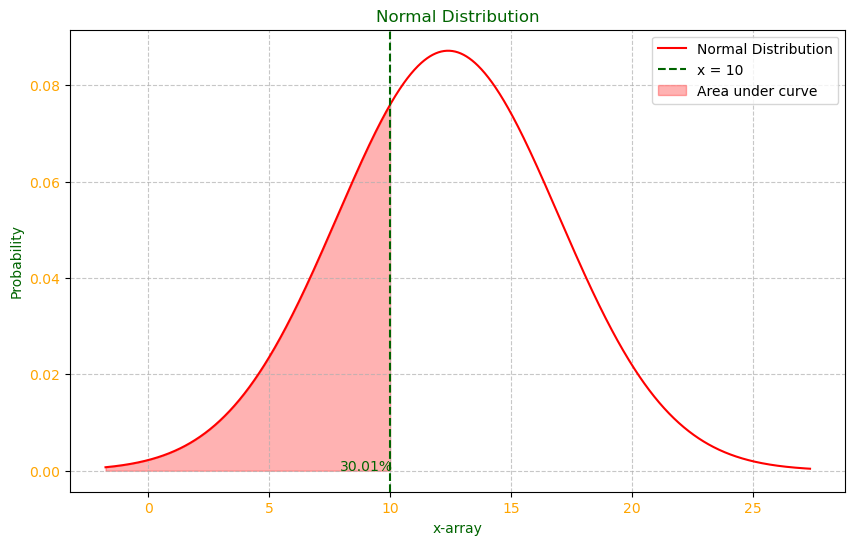

In [ ]:
#Taken from https://github.com/milicak/Data_Analysis_Course

fig, ax = plt.subplots(figsize=(10, 6))
# Plot the pdf of the normal distribution
ax.plot(x3, norm.pdf(x3, mu_temp, sigma_temp), color="red", label="Normal Distribution")
# Draw a red vertical line at x = N
ax.axvline(x=N, color="darkgreen", linestyle="--", label=("x = "+str(N)))

# Create an array of 50 numbers between min of x array and N
x1 = np.linspace(x3.min(), N, 50)

# Fill the specified region with red color
ax.fill_between(x1, norm.pdf(x1, mu_temp, sigma_temp), color="red", alpha=0.3, label="Area under curve")

ax.set(xlabel="x-array", ylabel="Probability")

ax.xaxis.label.set_color("darkgreen")
ax.yaxis.label.set_color("darkgreen")

ax.set_title("Normal Distribution", color="darkgreen")

# Add the percentage value on the plot
ax.text(N-1, 0.00015, f"{area_under_curve * 100:.2f}%", color="darkgreen", fontsize=10, ha='center')

ax.legend()

plt.xticks(color='orange')
plt.yticks(color='orange')

# Customize the grid lines
ax.grid(True, linestyle='--', alpha=0.7)
     